1. Student Performance

In [83]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, f1_score
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv(r"E:\Developer's arena Internship\Week4\Student performance.csv")

In [86]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [90]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [91]:
# (b) CLEAN THE DATA (handle missing values)
# ---------------------------------------
# Fill numeric with mean
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical with mode
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [93]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [95]:
# (c) LABEL ENCODE NON-NUMERICAL COLUMNS
# ---------------------------------------
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [97]:
#(d) STANDARDIZE USING STANDARD SCALER
scaler = StandardScaler()

In [117]:
# Define the target variable
y = df["Exam_Score"]

# Define the feature variables using a list
X = df[[
    "Hours_Studied", 
    "Attendance", 
    "Parental_Involvement", 
    "Access_to_Resources", 
    "Extracurricular_Activities", 
    "Previous_Scores", 
    "Motivation_Level", 
    "Internet_Access", 
    "Tutoring_Sessions", 
    "Family_Income", 
    "Teacher_Quality", 
    "School_Type", 
    "Peer_Influence", 
    "Physical_Activity", 
    "Learning_Disabilities", 
    "Parental_Education_Level", 
    "Distance_from_Home", 
    "Gender"
]]


In [119]:
# Standardize features
X_scaled = scaler.fit_transform(X)

In [121]:
# (f) TRAIN–TEST SPLIT & FIT RANDOM FOREST REGRESSION
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42
)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [123]:
# (g) METRICS: MAE, MSE, Sensitivity, Specificity, F1-score
# ---------------------------------------

# Regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("\nRegression Performance Metrics:")
print("MAE:", mae)
print("MSE:", mse)


Regression Performance Metrics:
MAE: 1.1450579929399902
MSE: 4.641102017145738


In [127]:
# Classification metrics (convert scores into binary classes)
median_score = y.median()

y_test_class = (y_test >= median_score).astype(int)
y_pred_class = (y_pred >= median_score).astype(int)

In [129]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_class, y_pred_class).ravel()

sensitivity = tp / (tp + fn)     # Recall
specificity = tn / (tn + fp)
f1 = f1_score(y_test_class, y_pred_class)

In [131]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_class, y_pred_class).ravel()

sensitivity = tp / (tp + fn)     # Recall
specificity = tn / (tn + fp)
f1 = f1_score(y_test_class, y_pred_class)

print("\nClassification Metrics (based on median split):")
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("F1-Score:", f1)


Classification Metrics (based on median split):
Sensitivity: 0.8661844484629295
Specificity: 0.8962371721778791
F1-Score: 0.8890951276102088


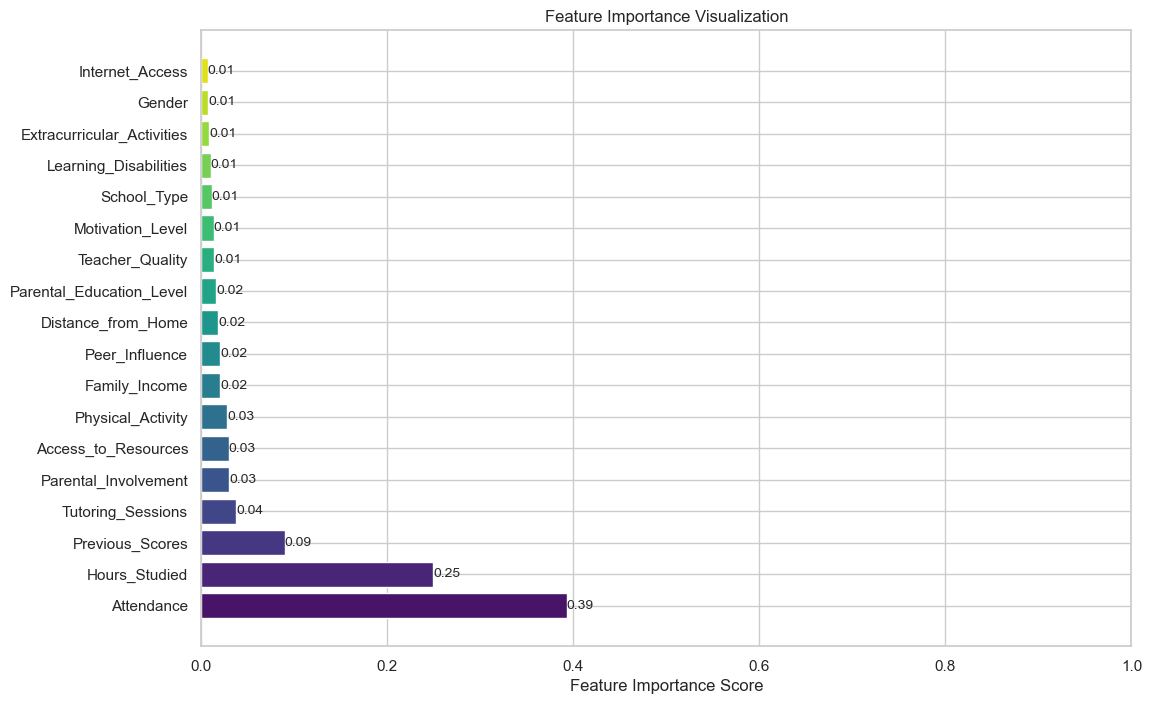

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestRegressor

# Sample DataFrame (assuming df is defined and contains relevant data)

# Define the target variable
y = df["Exam_Score"]

# Define the feature variables using a list
X = df[[
    "Hours_Studied", 
    "Attendance", 
    "Parental_Involvement", 
    "Access_to_Resources", 
    "Extracurricular_Activities", 
    "Previous_Scores", 
    "Motivation_Level", 
    "Internet_Access", 
    "Tutoring_Sessions", 
    "Family_Income", 
    "Teacher_Quality", 
    "School_Type", 
    "Peer_Influence", 
    "Physical_Activity", 
    "Learning_Disabilities", 
    "Parental_Education_Level", 
    "Distance_from_Home", 
    "Gender"
]]

# Fit a Random Forest Regressor and calculate feature importance
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
importances = model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set up the color palette
colors = sns.color_palette("viridis", len(feature_importance_df))

# Create a bar plot for feature importance
plt.figure(figsize=(12, 8))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=colors)

# Annotate bars with importance scores
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', fontsize=10)

plt.xlabel('Feature Importance Score')
plt.title('Feature Importance Visualization')
plt.xlim(0, 1)  # Set limit for x-axis to provide a clearer scale
plt.show()

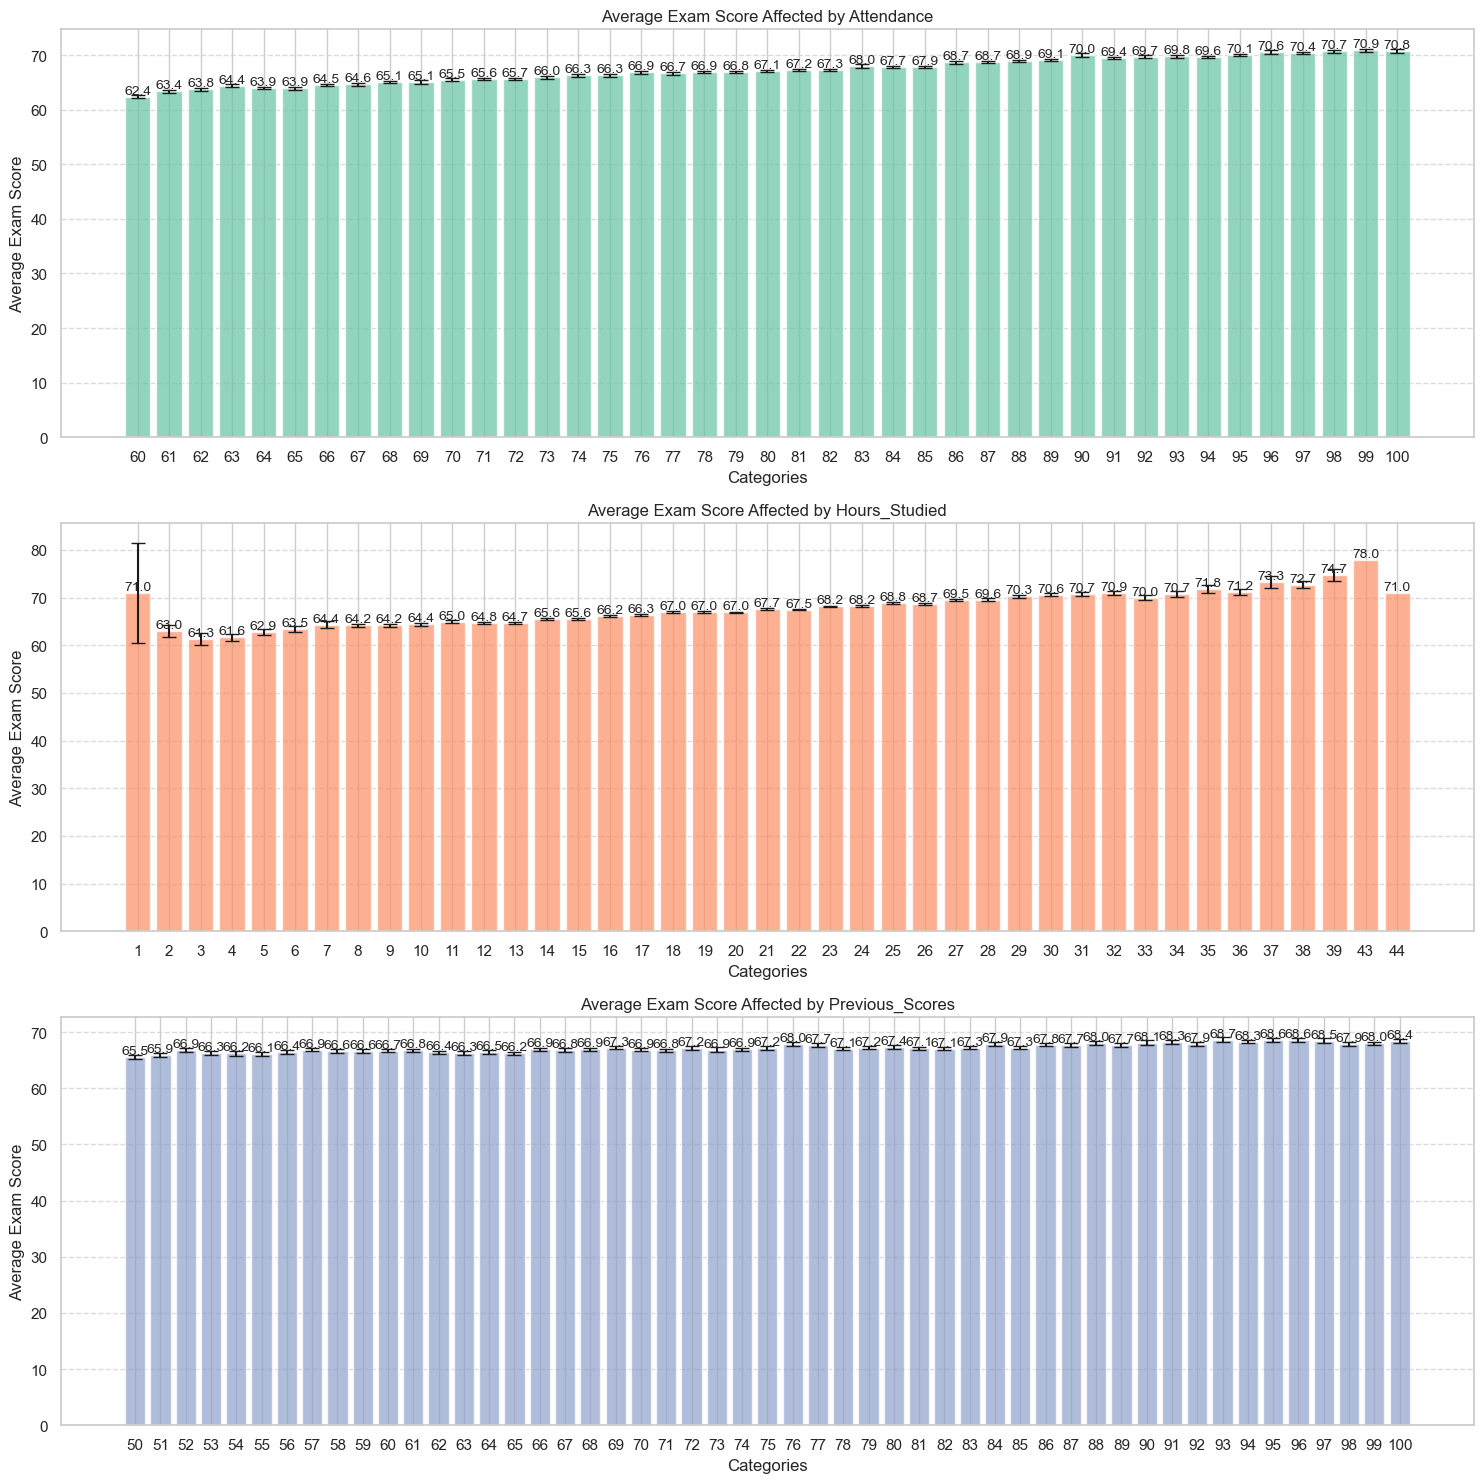

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample DataFrame (assuming df is defined and contains relevant data)

# Define the target variable (Exam Score)
y = df["Exam_Score"]

# Features to investigate
features = ["Attendance", "Hours_Studied", "Previous_Scores"]

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with subplots for each feature
fig, axes = plt.subplots(len(features), 1, figsize=(15, 5 * len(features)))

# Define a colormap
colors = sns.color_palette("Set2", len(features))

for i, col in enumerate(features):
    # Group and calculate means & standard errors
    grouped = df.groupby(col)["Exam_Score"].mean()
    error = df.groupby(col)["Exam_Score"].std() / df.groupby(col)["Exam_Score"].count() ** 0.5  # standard error
    
    # Create barplot with error bars for each feature
    bars = axes[i].bar(grouped.index.astype(str), grouped.values, yerr=error, capsize=5, 
                        color=colors[i], alpha=0.7)
    
    # Annotate bars with average exam scores
    for j, score in enumerate(grouped.values):
        axes[i].text(j, score, f'{score:.1f}', ha='center', va='bottom', fontsize=10)
    
    # Add labels and title for each subplot
    axes[i].set_xlabel('Categories')
    axes[i].set_ylabel('Average Exam Score')
    axes[i].set_title(f'Average Exam Score Affected by {col}')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Analysis of Each Feature
1. Attendance
The plot displays average exam scores categorized by different attendance levels.
Expected Insight: Higher attendance should correlate with higher average scores, indicating that more frequent class participation may enhance understanding of the material.
2. Hours Studied
This plot represents the average exam score based on the number of hours students report having studied.
Expected Insight: A trend where increased study hours lead to improved scores is anticipated, aligning with the idea that more preparation typically results in better performance.
3. Previous Scores
This bar plot indicates average exam scores based on prior performance.
Expected Insight: A strong correlation is likely, where higher previous scores predict better performance on subsequent exams, reinforcing the concept of graded progress and retention of knowledge.
Conclusion of Consistent Trends
The plots collectively suggest that attendance, hours studied, and previous scores are likely key indicators of student success.
If the trends show a clear relationship (e.g., higher averages with increased attendance or study hours), this could provide actionable insights for educators to promote strategies that enhance these factors.